In [5]:
import networkx as nx
from IPython.display import display
from ipywidgets import Dropdown
get_ipython().magic('matplotlib inline')

In [6]:
import tega.driver
d = tega.driver.Driver(host='192.168.57.133')
d.rpc('plugins.hook')
d.rpc('plugins.subnets')
subnets = d.get(path='graph.subnets')

In [7]:
def on_value_change(name, value):
    g = nx.DiGraph(subnets[value])
    nx.draw_spring(g, node_size=1000, with_labels=True, arrows=True, alpha=0.8)

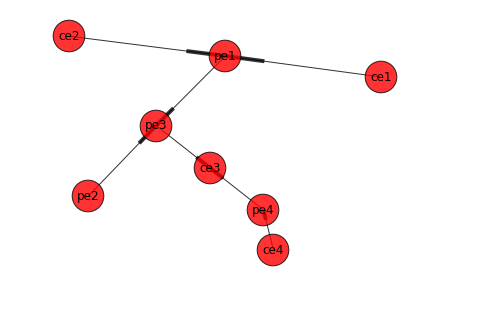

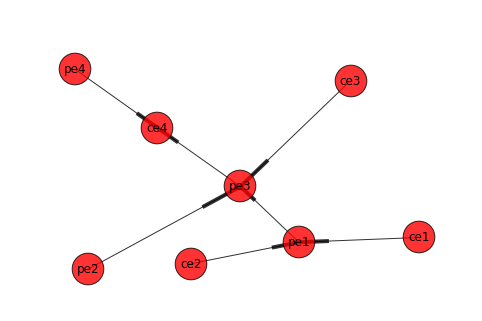

In [8]:
subnet_keys = [k for k in subnets.keys() if k.startswith('172.')]
subnet_keys.insert(0, '---subnet---')
dw = Dropdown(description='subnets', options=subnet_keys)
display(dw)
dw.on_trait_change(on_value_change, 'value')